1. What kind of questions are welcome on this site?
People can ask any kind of questions on Stack Exchange websites, from seeking solution to a problem, to general discussion around one topic.
Data Science Stack Exchange (DSSE) particularly focus on questions about an actual problem you have faced. Include details about what you have tried and exactly what you are trying to do.

2. What, other than questions, does the site's home subdivide into?
Stack Overflow site also provide job listings, talent solutions and advertising platform. DSSE also links to Stack Overflow job listing page.

3. Does any content look useful towards our goal?
The Q & A seems to be useful towards our goal as we can determine which topic received most questions, which questions received most answers/views.

4. What information is available in each post?
Title, tags, question and description of the problem, number of votes for posts, number of views, replies to question, comments, replies to comments, number of votes for replies/comments.

After exploring DSSE two tables (Posts and Tags), focusing on ViewCount, Score, FavoriteCount, TagName, Count columns, I found that Python is the most popular programmin language and machine learning, neural network, deep learning are the most popular topics discussed on this website.

In [1]:
import pandas as pd
dsse_posts = pd.read_csv('2019_questions.csv', parse_dates=['CreationDate'])

In [2]:
dsse_posts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8839 entries, 0 to 8838
Data columns (total 7 columns):
Id               8839 non-null int64
CreationDate     8839 non-null datetime64[ns]
Score            8839 non-null int64
ViewCount        8839 non-null int64
Tags             8839 non-null object
AnswerCount      8839 non-null int64
FavoriteCount    1407 non-null float64
dtypes: datetime64[ns](1), float64(1), int64(4), object(1)
memory usage: 483.5+ KB


- All columns except FavoriteCount has no missing values. FavoriteCount has 7432 missing values.
- We can fill missing values in FavoriteCount with 0.
- The FavoriteCount column type is float, so we should convert to integer. Other column type seems ok.
- The Tags column also contains special characters like '<','>' and '-'. We should remove these characters to make it easier to work with.

In [3]:
dsse_posts.fillna(0, axis=1, inplace=True)

In [4]:
dsse_posts['FavoriteCount'] = dsse_posts['FavoriteCount'].astype(int)

In [5]:
dsse_posts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8839 entries, 0 to 8838
Data columns (total 7 columns):
Id               8839 non-null int64
CreationDate     8839 non-null datetime64[ns]
Score            8839 non-null int64
ViewCount        8839 non-null int64
Tags             8839 non-null object
AnswerCount      8839 non-null int64
FavoriteCount    8839 non-null int64
dtypes: datetime64[ns](1), int64(5), object(1)
memory usage: 483.5+ KB


In [6]:
dsse_posts['Tags'] = dsse_posts['Tags'].str.rstrip('>').str.replace('>',',').str.replace('<','').str.split(',')

In [7]:
print(dsse_posts['Tags'].head())

0                      [machine-learning, data-mining]
1    [machine-learning, regression, linear-regressi...
2         [python, time-series, forecast, forecasting]
3                [machine-learning, scikit-learn, pca]
4             [dataset, bigdata, data, speech-to-text]
Name: Tags, dtype: object


In [8]:
tag = 'machine-learning'
tag_bool = dsse_posts['Tags'].apply(lambda t: tag in t)
tag_used = tag_bool.sum()
tag_viewed = dsse_posts[tag_bool]['ViewCount'].sum()
print(tag_bool.head())
print(tag_used)
print(tag_viewed)

0     True
1     True
2    False
3     True
4    False
Name: Tags, dtype: bool
2693
388499


In [9]:
tags_dict = {}
for t in dsse_posts['Tags']:
    for w in t:
         if w not in tags_dict:
            tags_dict[w] = {'used':0, 'viewed':0}
print(tags_dict)

{'java': {'viewed': 0, 'used': 0}, 'refit-model': {'viewed': 0, 'used': 0}, 'xboost': {'viewed': 0, 'used': 0}, 'convolution': {'viewed': 0, 'used': 0}, 'hurdle-model': {'viewed': 0, 'used': 0}, 'overfitting': {'viewed': 0, 'used': 0}, 'dplyr': {'viewed': 0, 'used': 0}, 'openai-gym': {'viewed': 0, 'used': 0}, 'sagemaker': {'viewed': 0, 'used': 0}, 'sequence-to-sequence': {'viewed': 0, 'used': 0}, 'gaussian': {'viewed': 0, 'used': 0}, 'tokenization': {'viewed': 0, 'used': 0}, 'weka': {'viewed': 0, 'used': 0}, 'matrix': {'viewed': 0, 'used': 0}, 'discriminant-analysis': {'viewed': 0, 'used': 0}, 'online-learning': {'viewed': 0, 'used': 0}, 'experiments': {'viewed': 0, 'used': 0}, 'implementation': {'viewed': 0, 'used': 0}, 'svm': {'viewed': 0, 'used': 0}, 'ensemble-modeling': {'viewed': 0, 'used': 0}, 'linux': {'viewed': 0, 'used': 0}, 'image-recognition': {'viewed': 0, 'used': 0}, 'feature-reduction': {'viewed': 0, 'used': 0}, 'mutual-information': {'viewed': 0, 'used': 0}, 'search': {'

In [10]:
for tag in tags_dict:
    tag_bool = dsse_posts['Tags'].apply(lambda t: tag in t)
    tags_dict[tag]['used'] = tag_bool.sum()
    tags_dict[tag]['viewed'] = dsse_posts[tag_bool]['ViewCount'].sum()
print(tags_dict['machine-learning'])
print(tags_dict['deep-learning'])
print(tags_dict['python'])

{'viewed': 388499, 'used': 2693}
{'viewed': 233628, 'used': 1220}
{'viewed': 537585, 'used': 1814}


In [11]:
tag_df = pd.DataFrame(tags_dict)

In [12]:
tag_df = tag_df.transpose()

In [13]:
print(tag_df.head())

                     used  viewed
.net                    1     438
3d-object-detection     1       7
3d-reconstruction       9    1129
ab-test                 6     153
accuracy               89   15233


In [14]:
tag_df = tag_df.sort_values('used', ascending=False).copy()

In [15]:
print(tag_df.head())

                  used  viewed
machine-learning  2693  388499
python            1814  537585
deep-learning     1220  233628
neural-network    1055  185367
keras              935  268608


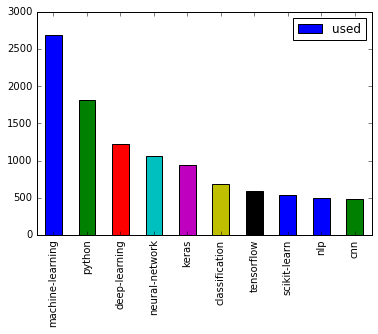

In [16]:
%matplotlib inline
tag_df[0:10].plot(kind='bar', y='used')

In [17]:
tag_df.sort_values('viewed',ascending=False,inplace=True)

In [18]:
print(tag_df.head())

                  used  viewed
python            1814  537585
machine-learning  2693  388499
keras              935  268608
deep-learning     1220  233628
pandas             354  201787


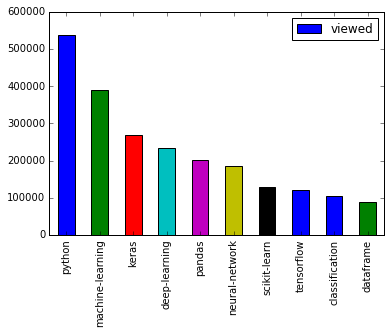

In [19]:
%matplotlib inline
tag_df[0:10].plot(kind='bar', y='viewed')

In [20]:
test = dsse_posts[dsse_posts["Tags"].apply(
    lambda tags: True if "python" in tags and "machine-learning" in tags else False)
].size

In [21]:
per = test / dsse_posts.size

In [22]:
print(per)

0.05645435003959724


In [23]:
test2 = dsse_posts[dsse_posts["Tags"].apply(
    lambda tags: True if "r" in tags and "pandas" in tags else False)
].size

In [24]:
per2 = test2/ dsse_posts.size
print(per2)

0.00022626994003846588


In [25]:
questions = pd.read_csv('all_questions.csv', parse_dates=['CreationDate'])

In [26]:
questions['Tags'] = questions['Tags'].str.rstrip('>').str.replace('>',',').str.replace('<','').str.split(',')

In [27]:
print(questions.head())

      Id        CreationDate  \
0  45416 2019-02-12 00:36:29   
1  45418 2019-02-12 00:50:39   
2  45422 2019-02-12 04:40:51   
3  45426 2019-02-12 04:51:49   
4  45427 2019-02-12 05:08:24   

                                                Tags  
0      [python, keras, tensorflow, cnn, probability]  
1                                   [neural-network]  
2                      [python, ibm-watson, chatbot]  
3                                            [keras]  
4  [r, predictive-modeling, machine-learning-mode...  


In [28]:
dl = ['deep-learning','neural-network','keras','tensorflow']
questions['year'] = questions['CreationDate'].dt.strftime('%Y').astype(int)
print(questions.head())

      Id        CreationDate  \
0  45416 2019-02-12 00:36:29   
1  45418 2019-02-12 00:50:39   
2  45422 2019-02-12 04:40:51   
3  45426 2019-02-12 04:51:49   
4  45427 2019-02-12 05:08:24   

                                                Tags  year  
0      [python, keras, tensorflow, cnn, probability]  2019  
1                                   [neural-network]  2019  
2                      [python, ibm-watson, chatbot]  2019  
3                                            [keras]  2019  
4  [r, predictive-modeling, machine-learning-mode...  2019  


In [46]:
questions['year'].value_counts()

2019    8810
2018    5475
2017    2957
2016    2146
2015    1167
2014     562
2020     459
Name: year, dtype: int64

In [72]:
post_dict = {}
for y in questions['year']:
    if y not in post_dict:
        post_dict[y] = {'deep-learning':0, 'total':0, 'dl-to-total':0}
print(post_dict)

{2016: {'dl-to-total': 0, 'deep-learning': 0, 'total': 0}, 2017: {'dl-to-total': 0, 'deep-learning': 0, 'total': 0}, 2018: {'dl-to-total': 0, 'deep-learning': 0, 'total': 0}, 2019: {'dl-to-total': 0, 'deep-learning': 0, 'total': 0}, 2020: {'dl-to-total': 0, 'deep-learning': 0, 'total': 0}, 2014: {'dl-to-total': 0, 'deep-learning': 0, 'total': 0}, 2015: {'dl-to-total': 0, 'deep-learning': 0, 'total': 0}}


In [73]:
for y in post_dict:
    for tag in dl:
        bool_mask = (questions['Tags'].apply(lambda t: tag in t)) & (questions['year'] == y)
        year_bool = questions['year'] == y
        post_dict[y]['deep-learning'] += bool_mask.sum()
        post_dict[y]['total'] += year_bool.sum()
        post_dict[y]['dl-to-total'] = round(100 * (post_dict[y]['deep-learning'] / post_dict[y]['total']),2)
print(post_dict)

{2016: {'dl-to-total': 6.59, 'deep-learning': 566, 'total': 8584}, 2017: {'dl-to-total': 10.62, 'deep-learning': 1256, 'total': 11828}, 2018: {'dl-to-total': 12.64, 'deep-learning': 2768, 'total': 21900}, 2019: {'dl-to-total': 10.74, 'deep-learning': 3785, 'total': 35240}, 2020: {'dl-to-total': 9.91, 'deep-learning': 182, 'total': 1836}, 2014: {'dl-to-total': 1.51, 'deep-learning': 34, 'total': 2248}, 2015: {'dl-to-total': 2.83, 'deep-learning': 132, 'total': 4668}}


In [87]:
dl_summary = pd.DataFrame(post_dict)

In [88]:
print(dl_summary)

                  2014     2015     2016      2017      2018      2019  \
deep-learning    34.00   132.00   566.00   1256.00   2768.00   3785.00   
dl-to-total       1.51     2.83     6.59     10.62     12.64     10.74   
total          2248.00  4668.00  8584.00  11828.00  21900.00  35240.00   

                  2020  
deep-learning   182.00  
dl-to-total       9.91  
total          1836.00  


In [89]:
dl_summary = dl_summary.transpose()

In [90]:
print(dl_summary)

      deep-learning  dl-to-total    total
2014           34.0         1.51   2248.0
2015          132.0         2.83   4668.0
2016          566.0         6.59   8584.0
2017         1256.0        10.62  11828.0
2018         2768.0        12.64  21900.0
2019         3785.0        10.74  35240.0
2020          182.0         9.91   1836.0
